<a href="https://colab.research.google.com/github/anoopjakob/AI_Lab_8_Linear_regression/blob/main/AI_lab_8_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [226]:
# Importing necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# importing some models for testing
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [227]:
# # upload files from local system

# from google.colab import files
# uploaded = files.upload()

## copy a file to another location.. in this case into google drive folder
# !cp '/content/1-D_x.csv' '/content/drive/MyDrive/AI-ML/AI_Lab_8'
# !cp '/content/1-D_y.csv' '/content/drive/MyDrive/AI-ML/AI_Lab_8'
# !cp '/content/2-D_x.csv' '/content/drive/MyDrive/AI-ML/AI_Lab_8'
# !cp '/content/2-D_y.csv' '/content/drive/MyDrive/AI-ML/AI_Lab_8'


In [228]:
 
     # LOADING AND PREPROCESSING DATA


one_d_X_df = pd.read_csv('/content/drive/MyDrive/AI-ML/AI_Lab_8/1-D_x.csv')
# giving appropriate column names
one_d_X_df.rename(columns={'column1':'Age'}, inplace=True)
print(one_d_X_df.describe())
# print(one_d_X_df)

print('\n')


one_d_Y_df = pd.read_csv('/content/drive/MyDrive/AI-ML/AI_Lab_8/1-D_y.csv')
one_d_Y_df.rename(columns={'column1':'Height'}, inplace=True)
print(one_d_Y_df.describe())


print('\n')

two_d_X_df = pd.read_csv('/content/drive/MyDrive/AI-ML/AI_Lab_8/2-D_x.csv')
two_d_X_df.rename(columns={'column1':'Living_Area',
                           'column2':'Number_of_Bedroom'},inplace=True)
print(two_d_X_df.describe())

print('\n')

two_d_Y_df = pd.read_csv('/content/drive/MyDrive/AI-ML/AI_Lab_8/2-D_y.csv')
two_d_Y_df.rename(columns={'column1':'Prices'}, inplace=True)
print(two_d_Y_df.describe())


             Age
count  50.000000
mean    4.923800
std     1.727304
min     2.070000
25%     3.412500
50%     4.835000
75%     6.312500
max     7.930000


          Height
count  50.000000
mean    1.064680
std     0.119296
min     0.779000
25%     0.964500
50%     1.080000
75%     1.147500
max     1.300000


       Living_Area  Number_of_Bedroom
count    47.000000          47.000000
mean   2001.106383           3.170213
std     795.271986           0.760982
min     852.000000           1.000000
25%    1435.000000           3.000000
50%    1890.000000           3.000000
75%    2270.000000           4.000000
max    4480.000000           5.000000


              Prices
count      47.000000
mean   340412.659574
std    125039.899586
min    169900.000000
25%    249900.000000
50%    299900.000000
75%    384450.000000
max    699900.000000


Single Variate Linear Regression using scikit learn 
 

Model Score:  0.8590387244123388
predicted heights 
 age 3.5 : [0.9735393] 
 age 7 : [1.19758231]


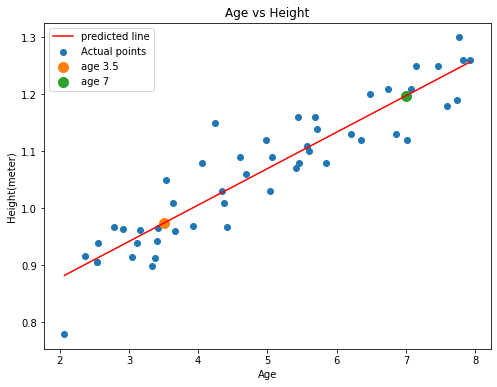

In [229]:

        # SINGLE VARIATE LINEAR REGRESSION USING SCIKIT LEARN


print('Single Variate Linear Regression using scikit learn \n \n')

X = one_d_X_df.Age.to_numpy() # to numpy array
X = X.reshape(-1,1) #array in array

y = one_d_Y_df.Height.to_numpy() # to numpy array

reg = LinearRegression().fit(X, y) # here both model selection and fitting happens

print("Model Score: ", reg.score(X, y)) # to print the model score..

y_pred = reg.predict(X) # These are the predictions which we will use to plot 

print(f'predicted heights \n age 3.5 : {reg.predict(np.array([[3.5]]))} \n age 7 : {reg.predict(np.array([[7]]))}')

# plotting
plt.figure(figsize=(8,6))
plt.scatter(one_d_X_df.Age, one_d_Y_df.Height , label ='Actual points')

plt.plot(one_d_X_df.Age, y_pred, color = 'red', label='predicted line' )

plt.scatter(3.5, reg.predict(np.array([[3.5]])) , label ='age 3.5 ', s=100)
plt.scatter(7, reg.predict(np.array([[7]])) , label ='age 7 ', s =100)

plt.xlabel('Age')
plt.ylabel('Height(meter)')
plt.title("Age vs Height")

plt.legend()
plt.show()

In [230]:

          # MULTIVARIATE LINEAR REGRESSION USING SCIKIT LEARN


print("Multi variate linear regression using scikit learn")

X = two_d_X_df.values

y = two_d_Y_df.values

reg = LinearRegression().fit(X, y) #here both model selection and fitting happens

print("Model Score: ", reg.score(X, y)) # to print the model score..
 # These are the predictions which we will use to plot 

predicted_price = reg.predict(np.array([[1650, 3]]))

print('predicted price for 1650 sqft and 3 bedrooms:', predicted_price)

Multi variate linear regression using scikit learn
Model Score:  0.7324340514838916
predicted price for 1650 sqft and 3 bedrooms: [[293075.17290841]]


In [231]:

# these coordinates are found out usinn reg.predict()
# by handpicking values such that each bedroom no is contained in the vector

list1 = [1000,1, 219974.50369809]
list2 = [1320,2,255829.80910009 ]
list3  = [1990, 4 , 331710.59512304]




p1 = np.array(list1)
p2 = np.array(list2)




p3 = np.array(list3)

# These two vectors are in the plane
v1 = p3 - p1
v2 = p2 - p1

# the cross product is a vector normal to the plane
cp = np.cross(v1, v2)
a, b, c = cp

# This evaluates a * x3 + b * y3 + c * z3 which equals d
d = np.dot(cp, p3)

print(f'The equation to plot the plane is \n \n {a}x + {b}y + {c}z = {d}')

# Z = (d-a*X - b*Y)/c

The equation to plot the plane is 
 
 -4170.175218950026x + 258796.90800400823y + 30.0z = 2687856.7999966824


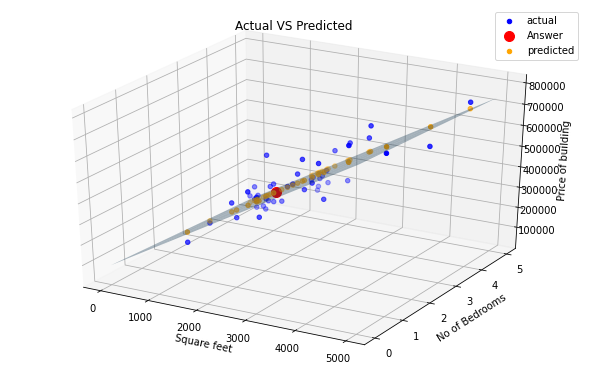

In [232]:
fig = plt.figure(figsize=(8,5))
ax = Axes3D(fig)

#plotting the points

ax.scatter3D(two_d_X_df.Living_Area, two_d_X_df.Number_of_Bedroom, 
             two_d_Y_df.Prices, color = "blue", label = 'actual')

ax.scatter3D([1650], [3], reg.predict(np.array([[1650, 3]])), 
             color='red', s=100, label='Answer')

ax.scatter3D(two_d_X_df.Living_Area, two_d_X_df.Number_of_Bedroom, 
             reg.predict(two_d_X_df.values), color = 'orange',label='predicted')



X = np.arange(0,6000 , 1000)
Y = np.arange(0, 6, 1)
X, Y = np.meshgrid(X, Y)
Z = (d-a*X - b*Y)/c 

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=.35)


ax.set_xlabel('Square feet')
ax.set_ylabel('No of Bedrooms')
ax.set_zlabel('Price of building')

plt.title('Actual VS Predicted ')
plt.legend()
plt.show()

 Part 1.


for single variate linear regression

> $y = \theta_0 + \theta_1 . X$ 

given: $ \alpha = 0.07$ and initialize parameters $\theta_0 = \theta_1 = 0$


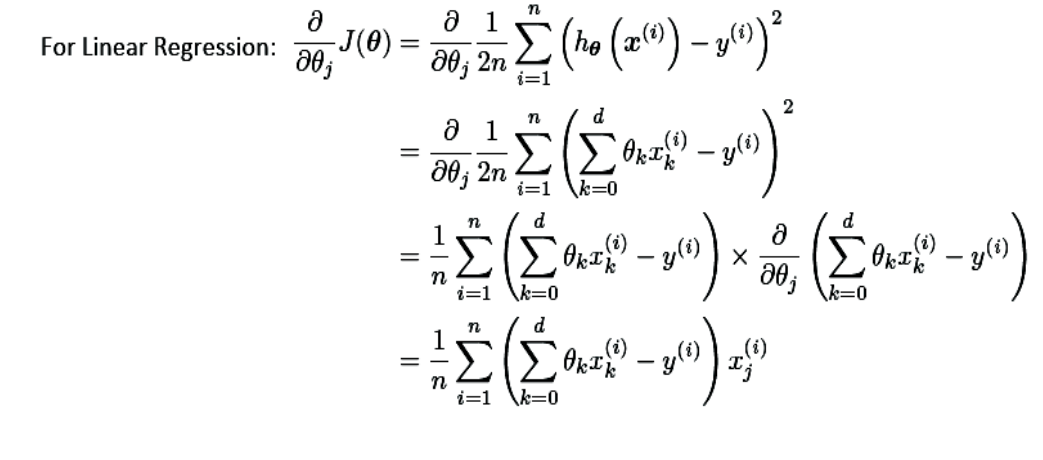


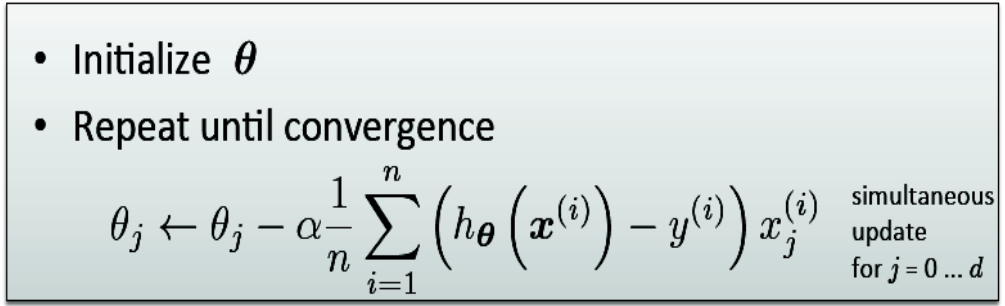

In [233]:
def predict(X_array, theta_0, theta_1):
  return theta_0 + theta_1*X_array


def fit(X_array, Y_array, lr, n_iter = 100000):
  
  theta_0 = 0
  theta_1 = 0

  check = 1000  # initialising check with a higher value
  check2 =1000  # same as above
  for i in range(n_iter):

    yhat_array = predict(X_array, theta_0, theta_1)
    error = Y_array - yhat_array
    # print(f'error: {error}')

    grad_X_0 = lr* np.sum(error)/len(X_array)
    grad_X_1 = lr* np.sum(error*X_array)/len(X_array)
    

    theta_0 = theta_0 + grad_X_0
    
    if (i > 10):
      if np.abs(np.abs(check)-np.abs(theta_0)) < 0.0000002:
        print(f'converged after {i} iterations')
        break

    check = theta_0

    theta_1 = theta_1 + grad_X_1

    # this is to check the convergence of thetas
    if (i > 10):
      if np.abs(np.abs(check2)-np.abs(theta_1)) < 0.000002:
        print(f'converged after {i} iterations \n')
        break
    check2 = theta_1

    if i==1:
      print(f'Value after one Iteration \n Theta_0 : {theta_0} ')
      print(f' Theta_1: {theta_1} \n \n')

  print(f'Final Theta_0 : {theta_0} and Theta_1: {theta_1}')
  return theta_0, theta_1


# this where the fitting happens and theta_0 and theta_1 are retrieved
theta_0, theta_1 = fit(one_d_X_df.Age.values, one_d_Y_df.Height.values,   0.07)

# predict(3.5, theta_0, theta_1)


Value after one Iteration 
 Theta_0 : 0.012844295036412004 
 Theta_1: 0.011657634144292328 
 

converged after 842 iterations 

Final Theta_0 : 0.7480037792273116 and Theta_1: 0.06428382908077915


predicted heights 
 age 3.5 : 0.9729971810100386
  age 7 : 1.1979905827927657


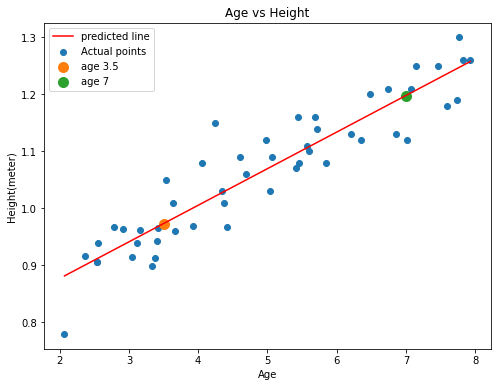

In [234]:
print(f'predicted heights \n age 3.5 : {predict(3.5,theta_0, theta_1)}')

print(f'  age 7 : {predict(7,theta_0 , theta_1)}')

plt.figure(figsize=(8,6))
plt.scatter(one_d_X_df.Age, one_d_Y_df.Height , label ='Actual points')

plt.plot(one_d_X_df.Age, predict(one_d_X_df.Age,  theta_0, theta_1), color = 'red', label='predicted line' )

plt.scatter(3.5, predict(3.5,  theta_0, theta_1) , label ='age 3.5 ', s=100)
plt.scatter(7, predict(7,  theta_0, theta_1) , label ='age 7 ', s =100)

plt.xlabel('Age')
plt.ylabel('Height(meter)')
plt.title("Age vs Height")

plt.legend()
plt.show()

## part 2 : multivariate linear regression

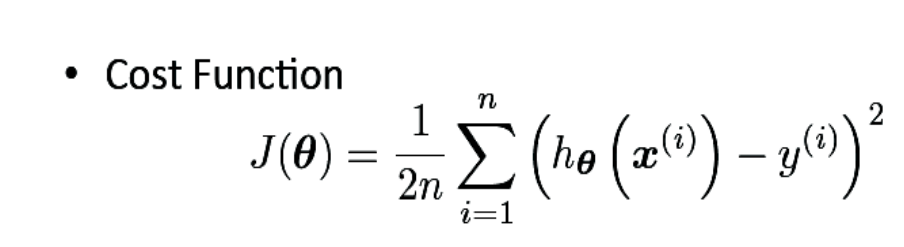

In [235]:
# working


# total rows of dataset 
n = len(x_1_norm)

# normalising the input features
def normalise_array(X_old):
  xmax = max(X_old)
  xmin = min(X_old)
  # print(xmax, xmin)
  X_new = (X_old - xmin)/(xmax - xmin)
  return np.array(X_new)

# normalising required for single prediction
def normalise_bedroom(X_old):
  xmax = max(two_d_X_df.Number_of_Bedroom)
  xmin = min(two_d_X_df.Number_of_Bedroom)

  X_new = (X_old - xmin)/(xmax - xmin)
  return X_new

def normalise_sqft(X_old):
  xmax = max(two_d_X_df.Living_Area)
  xmin = min(two_d_X_df.Living_Area)

  X_new = (X_old - xmin)/(xmax - xmin)
  return X_new

# preparing data to feed into the gradient descent function
def prepare_data():
  x_1_norm = normalise_array(two_d_X_df.Living_Area)
  x_2_norm = normalise_array(two_d_X_df.Number_of_Bedroom)

  newdf = pd.DataFrame(x_1_norm , columns=['sqft'])
  newdf['bedroom'] = x_2_norm
  newdf_array = newdf.values

  newdf = pd.concat([pd.Series(1, index=newdf.index, name='bias_in'), newdf], axis=1)
  return newdf


def predict(theta,X_array):
  return theta*X_array

def Cost(X, y, theta):
    yhat = predict(theta, X)
    yhat = np.sum(yhat, axis=1)
    return sum(np.sqrt((yhat-y)**2))/(2*n)

# gradient descent happens here
def Fit(X, y, alpha, n_iter):
    J = []  #cost function in each iterations
    # k = 0
    # while k < i:
    for i in range(n_iter):        
        yhat = predict(theta, X)
        yhat = np.sum(yhat, axis=1)

        theta[0] = theta[0] - alpha*(sum((yhat-y)*X.bias_in)/len(X))
        theta[1] = theta[1] - alpha*(sum((yhat-y)*X.sqft)/len(X))
        theta[2] = theta[2] - alpha*(sum((yhat-y)*X.bedroom)/len(X))

        # for idx in range(3):
        #     theta[idx] = theta[idx] - alpha*(sum((yhat-y)*X.iloc[:,idx])/len(X))
        j = Cost(X, y, theta)
        J.append(j)
        # k += 1
    return J, theta

def predict_one(sqft, bedroom, theta):
  x1 = normalise_sqft(sqft)
  x2 = normalise_bedroom(bedroom)

  d = {'bias_in': [1], 'sqft': [x1], 'bedroom': [x2]}
  outdf = pd.DataFrame(data=d)

  y_hat = predict(theta, outdf)
  y_hat = np.sum(y_hat, axis=1)
  return y_hat

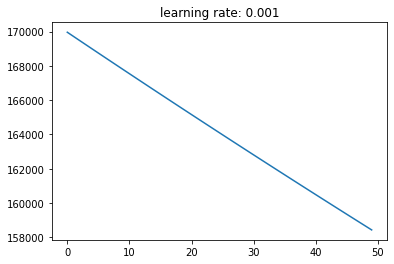

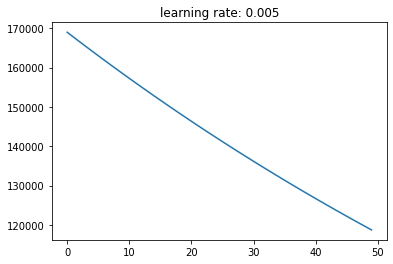

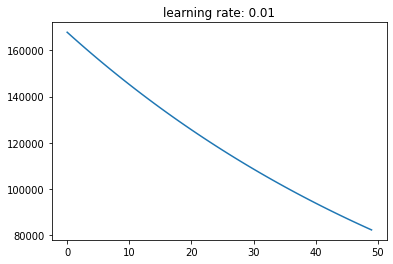

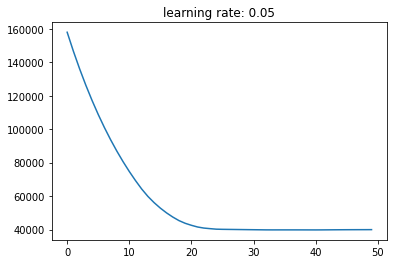

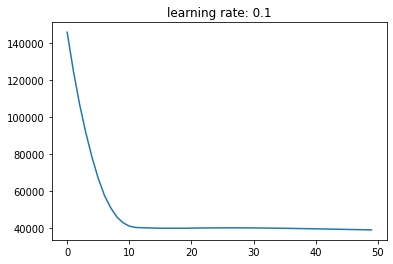

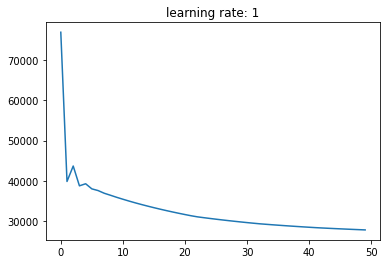

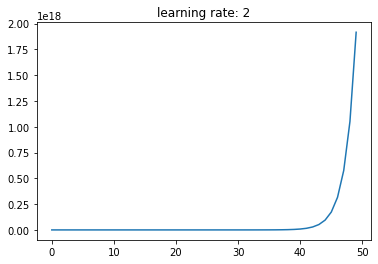

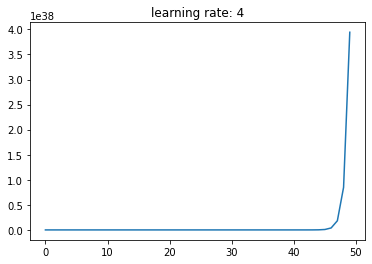

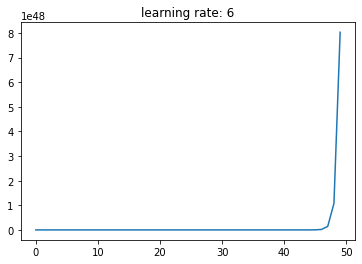

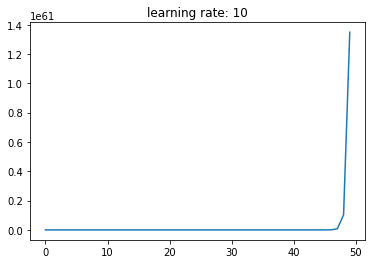

In [236]:
# plotting cost functions vs iterations for various learning rates

lr = [0.001, 0.005, 0.01, 0.05, 0.1, 1, 2 , 4, 6, 10]
input_df = prepare_data()

for lr in lr:
  theta = np.zeros(3) # initialise theta values
  J, theta = Fit(input_df,two_d_Y_df.Prices, lr, 50 )
  plt.plot(np.arange(0,len(J),1), J)
  plt.title(f'learning rate: {lr}')
  plt.show()


Learning Rate 0.1 seems like the best one from graphs

When Learning Rate is too small the convergence happens very slowly

Whern leanring Rate is too high the cost function increases.. which means its diverging

In [237]:
input_df = prepare_data() #preparing data, normalising, etc

theta = np.zeros(3) # initialising theta array

# this call gets us the cost function and theta value
J, theta = Fit(input_df,two_d_Y_df.Prices, 0.1, 5000 )

# separate function call to predict single instances
one_answer = predict_one(1650, 3, theta)


print(f'Final Thetas are {theta[0]}, {theta[1]}, {theta[2]} \n \n ')
print(f'1650 sqft 3 bedroom , predicted value {one_answer} \n')

Final Thetas are 199378.83106556587, 504264.9398158071, -34436.746530083314 
 
 
1650 sqft 3 bedroom , predicted value 0    293076.505753
dtype: float64 



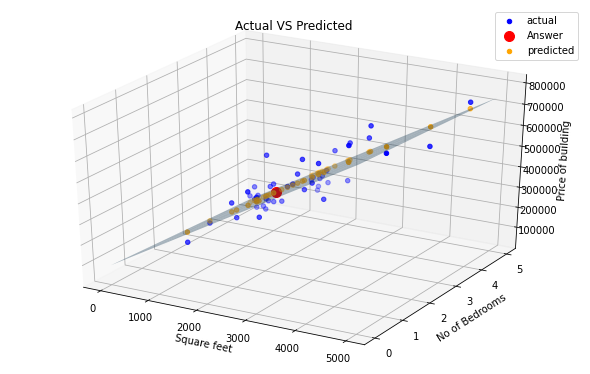

In [238]:
fig = plt.figure(figsize=(8,5))
ax = Axes3D(fig)

#prediction using our model happens here
y_hat = predict(theta, newdf)
y_hat = np.sum(y_hat, axis=1)


#plotting the points

ax.scatter3D(two_d_X_df.Living_Area, two_d_X_df.Number_of_Bedroom, 
             two_d_Y_df.Prices, color = "blue", label = 'actual')

# plotting answer
ax.scatter3D([1650], [3], one_answer, 
             color='red', s=100, label='Answer')

# plotting predicted points
ax.scatter3D(two_d_X_df.Living_Area, two_d_X_df.Number_of_Bedroom, 
             y_hat, color = 'orange',label='predicted')



X = np.arange(0,6000 , 1000)
Y = np.arange(0, 6, 1)
X, Y = np.meshgrid(X, Y)
Z = (d-a*X - b*Y)/c 

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=.35)

ax.set_xlabel('Square feet')
ax.set_ylabel('No of Bedrooms')
ax.set_zlabel('Price of building')

plt.title('Actual VS Predicted ')
plt.legend()
plt.show()